## CAPSTONE 2

### Narrative Analytics and Experimentation

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
%matplotlib inline

In [69]:
data = pd.read_csv('./oakland_street_cleaning_citation/street_sweeping_data.csv')

In [72]:
data.head()

,Citation Number,Citation Date,Citation Time,Violation Code,Violation Description,Location,Issued Amount,Location 1,Zip Codes
0,1708958182,2013-01-11T00:00:00.000,01:06,0240-10-28T00:00:00.000,NO PARK CERTAIN HRS,4439 PARK BLVD,66.0,"{'latitude': '37.808653', 'longitude': '-122.2...",1480.0
1,1708956126,2013-01-17T00:00:00.000,01:19,0240-10-28T00:00:00.000,NO PARK CERTAIN HRS,5376 BANCROFT AV,66.0,"{'latitude': '37.771845', 'longitude': '-122.2...",1188.0
2,1709160493,2013-02-08T00:00:00.000,10:06,0240-10-28T00:00:00.000,NO PARK CERTAIN HRS,4119 BAYO ST,66.0,"{'latitude': '37.7909', 'longitude': '-122.191...",1492.0
3,1709255365,2013-02-16T00:00:00.000,02:26,0240-10-28T00:00:00.000,NO PARK CERTAIN HRS,150 21ST ST,66.0,"{'latitude': '37.810045', 'longitude': '-122.2...",1489.0
4,1709382290,2013-03-01T00:00:00.000,00:40,0240-10-28T00:00:00.000,NO PARK CERTAIN HRS,4537 BOND ST,66.0,"{'latitude': '37.773132', 'longitude': '-122.2...",1188.0


For exploration purpose lets see the total number of citation for the three years across the zip codes in Oakland.From the following data information, we can observe that there are 20960 number of missing values from the the Zip Codes column.This number is 5.4% of the total column size.

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387385 entries, 0 to 387384
Data columns (total 12 columns):
Citation Number          387385 non-null int64
Citation Date            387385 non-null datetime64[ns]
Citation Time            387374 non-null object
Violation Code           387385 non-null object
Violation Description    387385 non-null object
Location                 387385 non-null object
Issued Amount            387385 non-null float64
Location 1               387242 non-null object
Zip Codes                366425 non-null float64
month_of_date            387385 non-null int64
day_of_date              387385 non-null int64
year_of_date             387385 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 35.5+ MB


In [5]:
counts_data = pd.DataFrame(data['Zip Codes'].value_counts()) 
counts_data

,Zip Codes
1188.0,42478
1484.0,41107
1483.0,38917
1489.0,35250
1486.0,33394
1485.0,26575
1481.0,23583
1487.0,22742
1493.0,22207
1480.0,19564


we can observe from the above numbers that the total number of street parking citation across the zipcodes has a large spread.Specially six of the zipcodes does not have a comparable number of citation with the other 14 zipcodes but from the boxplot on the above we do not have evidence that they are outliers.This might be due to a number of reasons such as being metropolitan area,suberb,industrial areas,agricultural areas,upscale residences and so forth.Or may it could be caused by the missing values from our data.

to have a general understanding about the spread of the data avross the time and check if the number of cleaning dates are the same every month in our data lets split the The Citation Date in to Year,Month and Day to do that lets run the following code;

In [76]:
data['Citation Date'] = pd.to_datetime(data['Citation Date'])
data['month_of_date'] = data['Citation Date'].dt.month
data['day_of_date'] = data['Citation Date'].dt.day
data['year_of_date'] = data['Citation Date'].dt.year
data.head()

,Citation Number,Citation Date,Citation Time,Violation Code,Violation Description,Location,Issued Amount,Location 1,Zip Codes,month_of_date,day_of_date,year_of_date
0,1708958182,2013-01-11,01:06,0240-10-28T00:00:00.000,NO PARK CERTAIN HRS,4439 PARK BLVD,66.0,"{'latitude': '37.808653', 'longitude': '-122.2...",1480.0,1,11,2013
1,1708956126,2013-01-17,01:19,0240-10-28T00:00:00.000,NO PARK CERTAIN HRS,5376 BANCROFT AV,66.0,"{'latitude': '37.771845', 'longitude': '-122.2...",1188.0,1,17,2013
2,1709160493,2013-02-08,10:06,0240-10-28T00:00:00.000,NO PARK CERTAIN HRS,4119 BAYO ST,66.0,"{'latitude': '37.7909', 'longitude': '-122.191...",1492.0,2,8,2013
3,1709255365,2013-02-16,02:26,0240-10-28T00:00:00.000,NO PARK CERTAIN HRS,150 21ST ST,66.0,"{'latitude': '37.810045', 'longitude': '-122.2...",1489.0,2,16,2013
4,1709382290,2013-03-01,00:40,0240-10-28T00:00:00.000,NO PARK CERTAIN HRS,4537 BOND ST,66.0,"{'latitude': '37.773132', 'longitude': '-122.2...",1188.0,3,1,2013


To understand the time effect on the overall number of citation over the three years data period,i plotted the number of citation per month.From the histogram plots below we can observe that for 2015 the data collection was until the begning of may.But for the 4 first month we can see that the number of citation has almost the same patern as the previous two years which indicates there was not significant visual effect of time in compromising the number of street cleaning citations. 

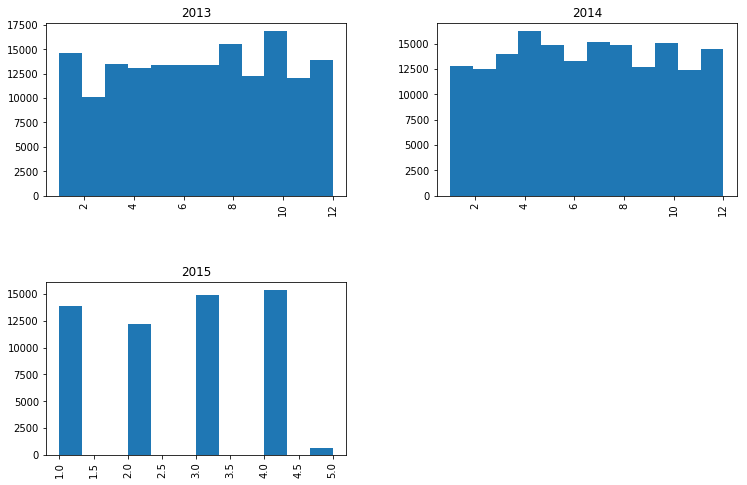

In [209]:
datetime_indexed_data = data[['year_of_date','month_of_date','day_of_date']].set_index(['year_of_date',
                                                                               'month_of_date','day_of_date'], 
                                                                                       drop = False)
datetime_indexed_data['month_of_date'].hist(by = datetime_indexed_data['year_of_date'], figsize = (12,8), bins = 12);

Now lets see the distribution per day using histogram to have more clearer view.

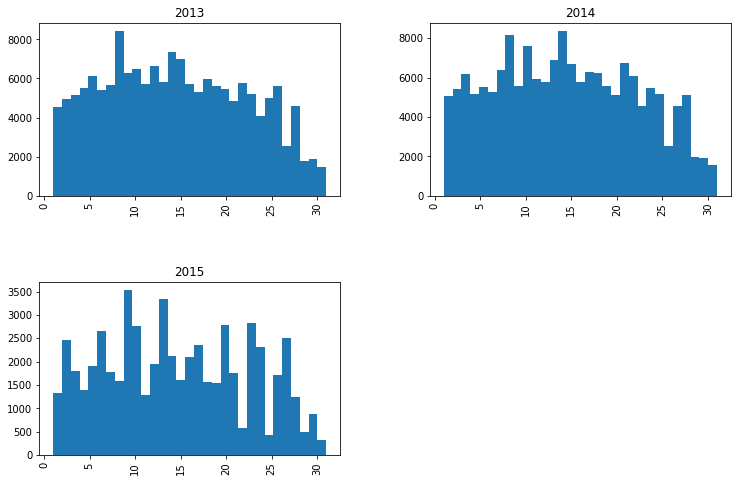

In [211]:
datetime_indexed_data['day_of_date'].hist(by = datetime_indexed_data['year_of_date'], figsize = (12,8), bins = 31);

In [208]:
datetime_indexed_data = data[['year_of_date','month_of_date','day_of_date']].set_index(['year_of_date',
                                                                               'month_of_date','day_of_date'])
datetime_indexed_data.head(30)

Empty DataFrame
Columns: []
Index: [(2013, 1, 11), (2013, 1, 17), (2013, 2, 8), (2013, 2, 16), (2013, 3, 1), (2013, 3, 27), (2013, 4, 7), (2013, 4, 22), (2013, 4, 30), (2013, 5, 1), (2013, 5, 5), (2013, 6, 10), (2013, 6, 25), (2013, 7, 3), (2013, 7, 5), (2013, 7, 22), (2013, 7, 22), (2013, 7, 27), (2013, 8, 13), (2013, 8, 26), (2013, 8, 27), (2013, 8, 28), (2013, 9, 3), (2013, 9, 10), (2013, 9, 25), (2013, 10, 2), (2013, 10, 3), (2013, 11, 3), (2013, 11, 18), (2013, 11, 22)]

from the above data frame we can understand that the number of cleaning dates are not uniform across the months for instance we can see it reflected in 2013.January through March are 2 days then on April 3 days and then on May and June again 2 on July 5 and so forth.

In [7]:
data['Location'].value_counts().count()

98899

The above value shows the total number of streets that parking citation was recorded.

From the street parking citation fines Issued Amount lets look how much revenue does the city of Oakland collected in the years 2013 - 2015.

In [8]:
data['Issued Amount'].sum()

25567690.0

The city of Oakland pays millions of dollars to clean the streets,And because of cars parked on the streets the cleaning work is not as efficient as it should be.On my understanding even if the city gets millions of dollars on citation,it would be an amount the city would rather be willing to pay for an efficient cleaning work.This leads me to conclude that millions of dollars is wasted because of luck of unawareness and causiousness during parking vehicles on streets.Even if the city of Oakland considers that as an important source of revenue,this study will support the push by a lowmakers for a fare act in regarding to public financial matters.

From the above senario,we have seen that how much money is wasted over the three years period due to street parking citations;and it should be understood that the city cleanliness is compromised and many people fall in to paying these painfull fines;I am one of them.Based on my situation and from stories told by friends and family i have a general understanding that this incidences happen because of luck of awareness during parking or confusion of days or distractions during parking and so forth.The key question is how do we alert people so that they know they are parking in a wrong street? based on the above causes of street parking citations which are undeliberate, and from public opinions, another additional alert mechaism on top of the sign posts which indicate day and time of street cleaning would have a significant effect in minimizing citations.

*Flashing lights on top of parking sign posts would grab the attention of people who try to park during street parking periods and this would intern reduce the street parking citations.*

Before moving forward with the experimentation it is very good to have a summerized understanding of our data environment to come up with an effective design to implement our test of significance.From our data exploration on the above we can present the following key points;
* the parking enforcement officers may not properly fill the Zip Code part during issuance of violation tickets,this was refleceted in the large number of missing values in the Zip Code column.Therefore for he ease of data cleaning and over all effective analysis it is good to remind the officers to fill the information as complete as they can.
* street cleaning schedule differs from one location to another.in some locations the streets are cleaned once a month and in some loations 4 times a month and in some 3 times per month and so forth.This claim can be supported from the above data exploration and from city of oakland's website on street sweeping maps. 


keeping in mind the characterstics of our experimentation data form,In order to check the validity of the above hypothesis, lets design an A/B experimentation to study the effect of our hypothetical treatment(puting light alert on the sign post) on reducing street cleaning parking citation.
The two groups we want to compare in this case are the streets signs with flashing light alert (treatment group) and streets signs without(control group).I have list the procedure that i followed while designing the experimentation as follows for easy followup;
* The first step is determining our sample size;lets simple random sample 2 independent samples of 20 streets(Location) each from each Zip Code.
* This will bring us to a total of 400 samples in control and 400 samples in treatment groups for all 20 Zip Codes.
* Our key metric is the number of Street parking citations per day and we will collect that information from the sampled street for both the control and treatment groups.

* First and for most lets draw 400 random samples for the next two months from all the Zip Codes streets(Location)and record the number of citations per day for the purpose of A/A testing.
* And collect another 400 random samples independent to the previous but drawn the same way and record the number of citations per day.Then compare the two samples to determine if their mean number of citations are not different.If there is no significant difference in the sample means then move forward and continue with the A/B test which is comparing the treatment group with the control group.In doing the A/B testing ;
* I would prefer to do the Rollout in two phases i.e 50:50;collecting the first 200 random samples from control which are independent to the previous two drawn samples of 400 and 200 random sample from the treatment groups independent to the previously drawn all samples for the first month.
* for the 20 streets on our treatment group we install the alerting devices and collect the data.Then compare the first phase datas from the  control and treatment group to see how our experimentation is doing.
* then after analysing the first phase i would Rollout the second phase and collect the data for 200 streets more in a sample for the first month in the same way as previous samples.And then analyse the difference.If the the mean number of street parking citation is decreased by over 10%,then the Flashing light alert on top of sign posts has a significant effect on reducing Street cleaning parking citations.therefore it is a good practice to install it throughout the city.